In [27]:
##FK MODEL DIMENSION 4 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy import signal
import seaborn as sns

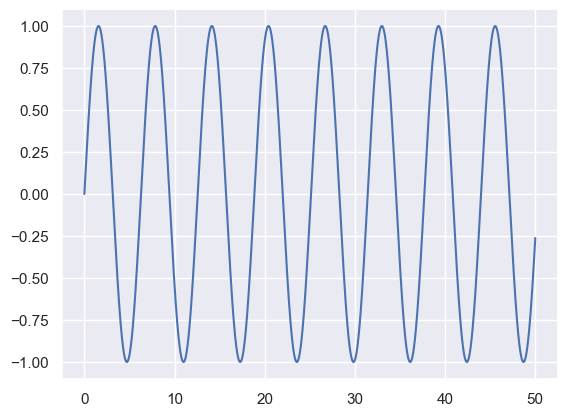

In [51]:
h = 0.01
np.random.seed(10)


time = np.linspace(0,50,5000)
F = 1*np.sin(time)
plt.plot(time,F)

In [52]:
J = np.array([[0,0,1,0],[0,0,0,1],[-1,0,0,0],[0,-1,0,0]])
Q = np.array([[2,-1,0,0],[-1,1,0,0],[0,0,1,0],[0,0,0,1]])
B = np.array([0,0,1,0])
print(Q)

[[ 2 -1  0  0]
 [-1  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0  1]]


In [53]:
det = np.zeros((4,4))
for i in range(4):
    det[i]=np.linalg.matrix_power(J@Q,i)@B
print(det)
print(np.linalg.det(det))

[[ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0. -2.  1.]
 [-2.  1.  0.  0.]]
-1.0


In [54]:
def Integrator(x,i):
  return x+h*(J@Q@x+B*F[i])

In [55]:
trajectory = [np.array([2,1,-3,-3])]
for i in range(999):
  trajectory.append(Integrator(trajectory[-1],i))

Text(0, 0.5, 'position_2')

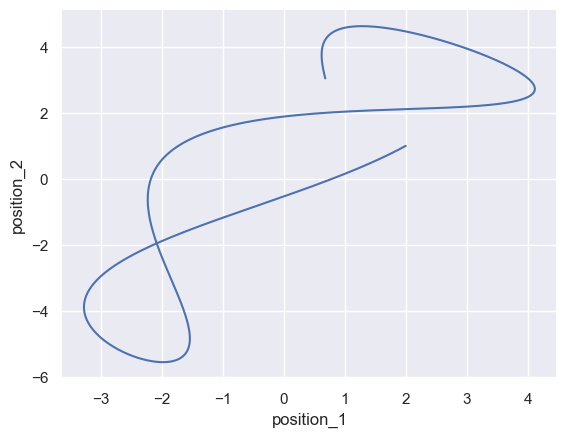

In [56]:
plt.plot([trajectory[i][0] for i in range(1000)], [trajectory[i][1] for i in range(1000)])
plt.xlabel("position_1")
plt.ylabel("position_2")

In [57]:
output = [(B.T)@Q@item for item in trajectory]

torch.Size([1000])

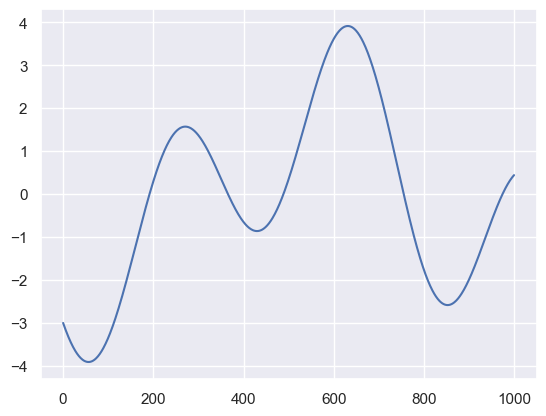

In [58]:
plt.plot(output)
data = torch.FloatTensor(np.array(output))
data.shape

In [59]:
def Integrator2(x,i):
  d = torch.FloatTensor(np.zeros(2))
  d[0]=torch.abs(d1)
  d[1]=torch.abs(d1)+torch.abs(d2)

  A=torch.FloatTensor([[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0]])
  A[0][3]=-torch.square(d[0]*d[1])
  A[2][3]=-torch.square(d[0])-torch.square(d[1])
  B=torch.FloatTensor([0,0,0,0])
  c0 = torch.abs(d[0])*torch.square(v1)+torch.abs(d[1])*torch.square(v2)
  c2 = torch.abs(d[0])*torch.square(d[1])*torch.square(v1)+torch.abs(d[1])*torch.square(d[0])*torch.square(v2)
  B[1] = c2
  B[3]= c0
  return x+h*(A@x+B*F[i])

In [60]:
x=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,4)]))
d1=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
d2=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
v1=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
v2=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,1)]))
num_epochs=2000
optimizer=optim.Adam((x,d1,d2,v1,v2), lr=0.02)
loss_rec = []
x_rec = []
d_rec = []
v_rec = []
test_error_rec = []

In [61]:
validation_error = []

In [62]:
trajectory = [np.array([2,1,-3,-3])]
for i in range(1999):
  trajectory.append(Integrator(trajectory[-1],i))
output = [(B.T)@Q@item for item in trajectory]

for k in range(num_epochs):
  optimizer.zero_grad()
  fake_data = torch.FloatTensor(1000,4)
  fake_data[0]=x
  for i in range(1,1000):
    temp = fake_data[i-1].clone()
    fake_data[i]=Integrator2(temp,i-1)
    del temp
  loss=torch.sum(torch.square(fake_data[:,3]-data))
  print("Epoch:",k,"Loss",loss)
  loss.backward()
  optimizer.step()
  del loss
  del fake_data

  if k%5==0:
    fake_data = torch.FloatTensor(2000,4)
    fake_data[0]=x
    for i in range(1,2000):
      temp2 = fake_data[i-1].clone()
      fake_data[i]=Integrator2(temp2,i-1)
      del temp2
    result = fake_data[:,3]
    prediction = result.detach().numpy()
    test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))
    test_error_rec.append(test_error)
    print("Test Error:", test_error)
    validation_error.append(test_error)
    del result
    del prediction
    del fake_data

Epoch: 0 Loss tensor(12149.5771, grad_fn=<SumBackward0>)
Test Error: 16018.013749360452
Epoch: 1 Loss tensor(10672.4180, grad_fn=<SumBackward0>)
Epoch: 2 Loss tensor(9239.6865, grad_fn=<SumBackward0>)
Epoch: 3 Loss tensor(7917.8315, grad_fn=<SumBackward0>)
Epoch: 4 Loss tensor(6788.9146, grad_fn=<SumBackward0>)
Epoch: 5 Loss tensor(5929.5298, grad_fn=<SumBackward0>)
Test Error: 8409.955300709733
Epoch: 6 Loss tensor(5378.0625, grad_fn=<SumBackward0>)
Epoch: 7 Loss tensor(5109.9512, grad_fn=<SumBackward0>)
Epoch: 8 Loss tensor(5045.8516, grad_fn=<SumBackward0>)
Epoch: 9 Loss tensor(5090.9785, grad_fn=<SumBackward0>)
Epoch: 10 Loss tensor(5171.3267, grad_fn=<SumBackward0>)
Test Error: 4037.5853660834296
Epoch: 11 Loss tensor(5243.9272, grad_fn=<SumBackward0>)
Epoch: 12 Loss tensor(5289.3716, grad_fn=<SumBackward0>)
Epoch: 13 Loss tensor(5301.3379, grad_fn=<SumBackward0>)
Epoch: 14 Loss tensor(5279.3716, grad_fn=<SumBackward0>)
Epoch: 15 Loss tensor(5225.2388, grad_fn=<SumBackward0>)
Test

KeyboardInterrupt: 

In [63]:
print(x,d1,d2,v1,v2)

Parameter containing:
tensor([[-1.8808, -5.0522, -2.9705, -2.9774]], requires_grad=True) Parameter containing:
tensor([[0.6134]], requires_grad=True) Parameter containing:
tensor([[-1.0068]], requires_grad=True) Parameter containing:
tensor([[-1.5630e-10]], requires_grad=True) Parameter containing:
tensor([[0.1615]], requires_grad=True)


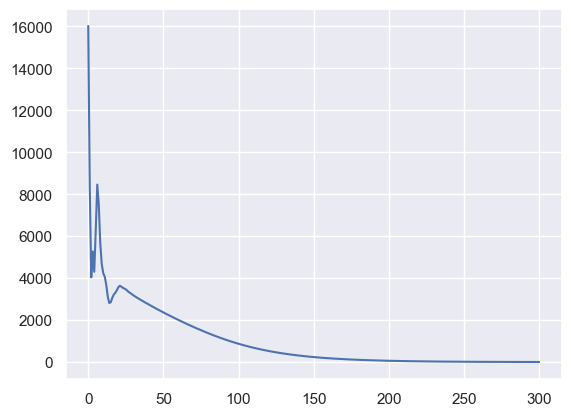

In [64]:
plt.plot(validation_error)

In [65]:
validation_error

[16018.013749360452,
 8409.955300709733,
 4037.5853660834296,
 5274.349709282349,
 4306.232984025723,
 6299.173104697818,
 8460.695440937634,
 7514.504827591318,
 5662.89711962766,
 4663.798333953091,
 4231.283370709312,
 4069.276055047268,
 3673.0225281506614,
 3113.8806208120895,
 2813.9009274625814,
 2852.2887490746016,
 3064.0253585022433,
 3219.455710831711,
 3300.504908146344,
 3417.4793447107386,
 3565.4574742743525,
 3635.3261826566577,
 3598.361898859983,
 3540.1263431571415,
 3507.3017905435295,
 3465.1489874777744,
 3397.320673392933,
 3335.927225874728,
 3289.694414876718,
 3237.946394045647,
 3182.250024188669,
 3135.5027665781877,
 3091.598799647651,
 3045.281892060171,
 3002.219406920188,
 2961.477081453772,
 2919.202226665916,
 2877.476537371149,
 2836.6518670997516,
 2795.116597993865,
 2753.9633348333523,
 2713.60013061197,
 2673.350496584555,
 2633.7061517046563,
 2594.6590876083396,
 2555.8401013814687,
 2517.4002778459576,
 2479.264050202098,
 2441.2970697925593,
 

In [74]:
len(validation_error)

301

In [66]:
np.linalg.eig(J@Q)[0]

array([-1.37048816e-20+1.61803399j, -1.37048816e-20-1.61803399j,
        5.95659421e-17+0.61803399j,  5.95659421e-17-0.61803399j])

In [67]:
trajectory = [np.array([2,1,-3,-3])]
for i in range(4999):
  trajectory.append(Integrator(trajectory[-1],i))

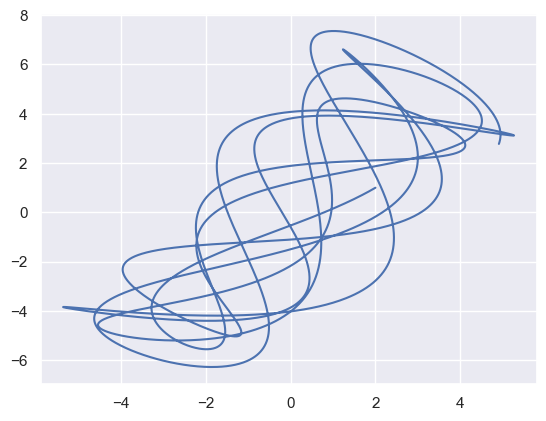

In [68]:
plt.plot([trajectory[i][0] for i in range(5000)], [trajectory[i][1] for i in range(5000)])

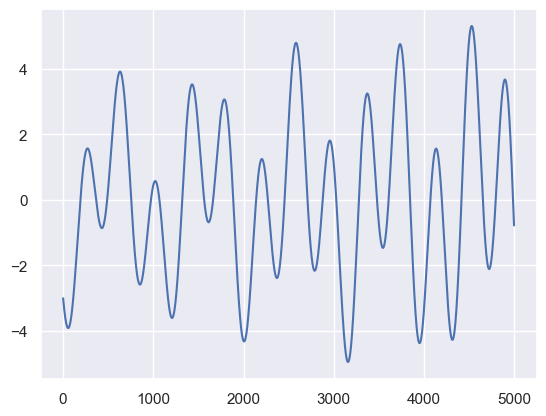

In [69]:
output = [(B.T)@Q@item for item in trajectory]
plt.plot(output)

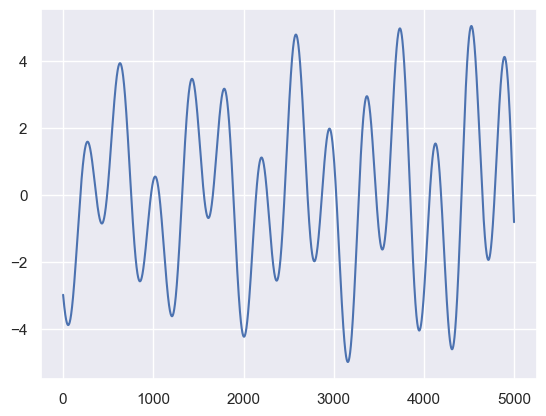

In [70]:
prediction = []
fake_data = torch.FloatTensor(5000,4)
fake_data[0]=x
for i in range(1,5000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,3]
prediction = result.detach().numpy()
plt.plot(prediction)
train_error = np.sum(np.square(prediction[:500]-np.array(output)[:500]))
test_error = np.sum(np.square(prediction[500:]-np.array(output)[500:]))

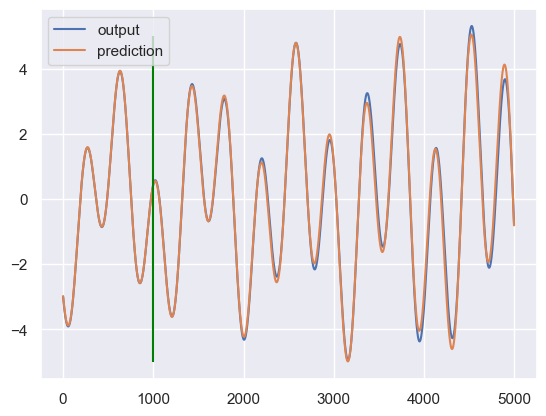

In [71]:
plt.figure()
plt.plot(output, label = 'output')
plt.plot(prediction, label = 'prediction')
plt.vlines(ymin=-5,ymax=5,x=1000,color="green")
plt.legend()

In [72]:
train_error, test_error

(0.19936255070265194, 198.0158114902206)

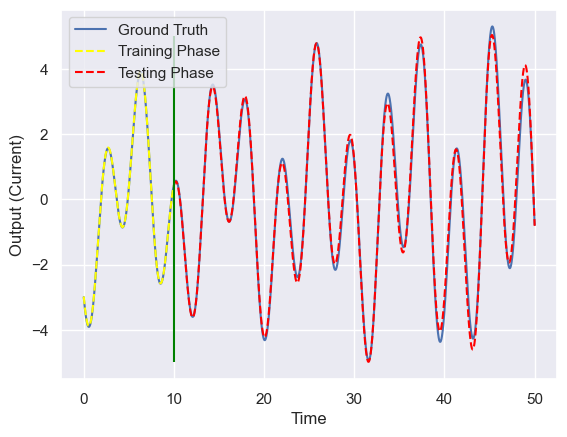

In [75]:
sns.set()
plt.plot(np.linspace(0,50,5000),output, label = 'Ground Truth')
plt.plot(np.linspace(0,50,5000)[:1000],prediction[:1000], label = 'Training Phase', linestyle="dashed", color = "yellow")
plt.plot(np.linspace(0,50,5000)[1000:5000],prediction[1000:5000], label = 'Testing Phase', linestyle="dashed", color="red")
plt.vlines(color="green",ymin=-5,ymax=5,x=10)
plt.xlabel("Time")
plt.ylabel("Output (Current)")
plt.legend()
plt.savefig("Visualization for paper/FK_quotient.pdf", bbox_inches='tight')